# AirGo and Laminair

On Twitter, a couple of people in the Clean Air Community had posted about designs that provide high reduction in aerosols over reasonable distances for a personal air cleaner (e.g. 20 inches).

For example, [ee_kelsey](https://twitter.com/ee_kelsey/status/1520420718797897729/photo/1) posted data he collected on using Smart Air S filter showing great reduction in PM 2.5.

<img src="https://pbs.twimg.com/media/FRmejMvXsActo8l?format=jpg&name=small" width=500>

CleanAirStars also posted something similar. The commonalities:
- PC fans pushing air through an efficient particle filter (EPA 11, EPA 12).
- Large filter
- Slow moving air

The combination of these leads relatively clean air at longer distances.

I made a similar build using the Smart Air S filter, which I call Laminair: 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utilities import between, plot, plot_one_graph, read_csv, get_fit_factor_between_two_events, get_fit_factors

In [19]:
airgo_1 = read_csv('./airgo_fan_on_off_1.csv')
airgo_2 = read_csv('./airgo_fan_on_off_2.csv')

laminair_1 = read_csv('./laminair_with_fan_on_off_1.csv')
laminair_2 = read_csv('./laminair_with_fan_on_off_2.csv')

laminair_and_airgo_1 = read_csv('./laminair_and_airgo_fan_on_off_1.csv')
laminair_and_airgo_2 = read_csv('./laminair_and_airgo_fan_on_off_2.csv')

laminair_and_airgo_1_14_inches = read_csv('./laminair_and_airgo_14_inches_1.csv')
laminair_and_airgo_2_14_inches = read_csv('./laminair_and_airgo_14_inches_2.csv')

In [20]:
for x in [airgo_1, laminair_1, laminair_and_airgo_1, laminair_and_airgo_1_14_inches]:
    x['pm1 breathing area'] = x['pm1']

for x in [airgo_2, laminair_2, laminair_and_airgo_2, laminair_and_airgo_2_14_inches]:
    x['pm1 ambient'] = x['pm1']

<Axes: xlabel='timestamp'>

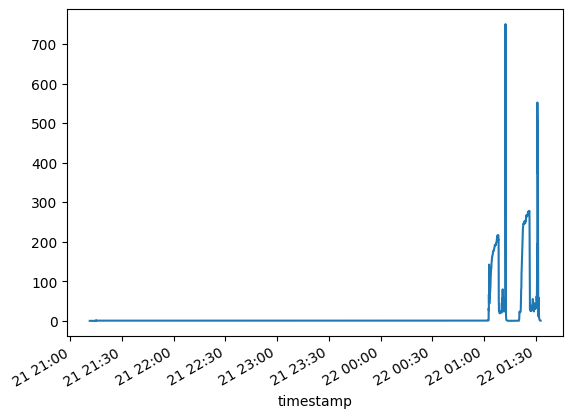

In [4]:
laminair_and_airgo_1['pm1'].plot()

In [31]:
normal_breathing_start_offset = pd.to_timedelta('15 seconds')

laminair_metadata = [
    {
        'title': 'Laminair (21 inches) - Fan on',
        'window': {
            'start': pd.to_datetime('2023-11-21 20:02:21 -05:00'), 
            'end': pd.to_datetime('2023-11-21 20:02:21 -05:00') + pd.to_timedelta('10 minutes 02 seconds')
        },
        'events': [
            {
                'event': 'start fan & humidifier at max',
                'color': 'red',
                'timedelta': pd.to_timedelta('0 minutes 10 seconds')
            },
            {
                'event': 'humidifier set to min',
                'color': 'pink',
                'timedelta': pd.to_timedelta('1 minutes 58 seconds')
            },
            {
                'event': 'normal breathing',
                'color': 'orange',
                'timedelta': pd.to_timedelta('2 minutes 14 seconds') + normal_breathing_start_offset
            },
            {
                'event': 'deep breathing',
                'color': 'yellow',
                'timedelta': pd.to_timedelta('3 minutes 0 seconds')
            },
            {
                'event': 'talking',
                'color': 'green',
                'timedelta': pd.to_timedelta('4 minutes 0 seconds')
            },
            {
                'event': 'eating',
                'color': 'cyan',
                'timedelta': pd.to_timedelta('5 minutes 7 seconds')
            },
            {
                'event': 'eating - stop',
                'color': 'blue',
                'timedelta': pd.to_timedelta('6 minutes 0 seconds')
            }
        ]
    },
    {
        'title': 'Laminair (21 inches) - Fan off',
        'window': {
            'start': pd.to_datetime('2023-11-21 20:02:21 -05:00'), 
            'end': pd.to_datetime('2023-11-21 20:02:21 -05:00') + pd.to_timedelta('10 minutes 02 seconds')
        },
        'events': [
            {
                'event': 'turn off fan',
                'color': 'red',
                'timedelta': pd.to_timedelta('6 minutes 5 seconds')
            },
            {
                'event': 'normal breathing',
                'color': 'orange',
                'timedelta': pd.to_timedelta('6 minutes 9 seconds') + normal_breathing_start_offset
            },
            {
                'event': 'deep breathing',
                'color': 'yellow',
                'timedelta': pd.to_timedelta('7 minutes 5 seconds')
            },
            {
                'event': 'talking',
                'color': 'green',
                'timedelta': pd.to_timedelta('8 minutes 5 seconds')
            },
            {
                'event': 'eating',
                'color': 'cyan',
                'timedelta': pd.to_timedelta('9 minutes 3 seconds')
            },
            {
                'event': 'eating - stop',
                'color': 'blue',
                'timedelta': pd.to_timedelta('10 minutes 0 seconds')
            }
        ]
    }
        
]

In [6]:
airgo_metadata = [
    {
        'title': 'AirGo - Fan on',
        'window': {
            'start': pd.to_datetime('2023-11-21 20:38:11 -05:00'), 
            'end': pd.to_datetime('2023-11-21 20:38:11 -05:00') + pd.to_timedelta('9 minutes 23 seconds')
        },
        'events': [
            {
                'event': 'start fan & humidifier at max',
                'color': 'red',
                'timedelta': pd.to_timedelta('0 minutes 13 seconds')
            },
            {
                'event': 'normal breathing',
                'color': 'orange',
                'timedelta': pd.to_timedelta('1 minutes 22 seconds') + normal_breathing_start_offset
            },
            {
                'event': 'deep breathing',
                'color': 'yellow',
                'timedelta': pd.to_timedelta('2 minutes 20 seconds')
            },
            {
                'event': 'talking',
                'color': 'green',
                'timedelta': pd.to_timedelta('3 minutes 20 seconds')
            },
            {
                'event': 'eating',
                'color': 'cyan',
                'timedelta': pd.to_timedelta('4 minutes 20 seconds')
            },
            {
                'event': 'eating - stop',
                'color': 'blue',
                'timedelta': pd.to_timedelta('5 minutes 20 seconds')
            }
        ]
    },
    {
        'title': 'AirGo - Fan off',
        'window': {
            'start': pd.to_datetime('2023-11-21 20:38:11 -05:00'), 
            'end': pd.to_datetime('2023-11-21 20:38:11 -05:00') + pd.to_timedelta('9 minutes 23 seconds')
        },
        'events': [
            {
                'event': 'turn off fan',
                'color': 'red',
                'timedelta': pd.to_timedelta('5 minutes 22 seconds')
            },
            {
                'event': 'normal breathing',
                'color': 'orange',
                'timedelta': pd.to_timedelta('5 minutes 28 seconds') + normal_breathing_start_offset
            },
            {
                'event': 'deep breathing',
                'color': 'yellow',
                'timedelta': pd.to_timedelta('6 minutes 18 seconds')
            },
            {
                'event': 'talking',
                'color': 'green',
                'timedelta': pd.to_timedelta('7 minutes 20 seconds')
            },
            {
                'event': 'eating',
                'color': 'cyan',
                'timedelta': pd.to_timedelta('8 minutes 20 seconds')
            },
            {
                'event': 'eating - stop',
                'color': 'blue',
                'timedelta': pd.to_timedelta('9 minutes 20 seconds')
            }
        ]
    }
]

In [32]:
airgo_and_laminair_metadata = [
    {
        'title': 'AirGo & Laminair (21 inches) - Fan on',
        'window': {
            'start': pd.to_datetime('2023-11-21 20:21:01 -05:00'), 
            'end': pd.to_datetime('2023-11-21 20:21:01 -05:00') + pd.to_timedelta('9 minutes 46 seconds')
        },
        'events': [
            {
                'event': 'start fan & humidifier at max',
                'color': 'red',
                'timedelta': pd.to_timedelta('0 minutes 8 seconds')
            },
            {
                'event': 'humidifier at min',
                'color': 'pink',
                'timedelta': pd.to_timedelta('1 minutes 25 seconds')
            },
            {
                'event': 'normal breathing',
                'color': 'orange',
                'timedelta': pd.to_timedelta('1 minutes 30 seconds') + normal_breathing_start_offset
            },
            {
                'event': 'deep breathing',
                'color': 'yellow',
                'timedelta': pd.to_timedelta('2 minutes 30 seconds')
            },
            {
                'event': 'talking',
                'color': 'green',
                'timedelta': pd.to_timedelta('3 minutes 30 seconds')
            },
            {
                'event': 'eating',
                'color': 'cyan',
                'timedelta': pd.to_timedelta('4 minutes 24 seconds')
            },
            {
                'event': 'eating - stop',
                'color': 'blue',
                'timedelta': pd.to_timedelta('5 minutes 20 seconds')
            }
        ]
    },
    {
        'title': 'AirGo & Laminair (21 inches) - Fan off',
        'window': {
            'start': pd.to_datetime('2023-11-21 20:21:01 -05:00'), 
            'end': pd.to_datetime('2023-11-21 20:21:01 -05:00') + pd.to_timedelta('9 minutes 46 seconds')
        },
        'events': [
            {
                'event': 'turn off fan',
                'color': 'red',
                'timedelta': pd.to_timedelta('5 minutes 23 seconds')
            },
            {
                'event': 'normal breathing',
                'color': 'orange',
                'timedelta': pd.to_timedelta('5 minutes 27 seconds') + normal_breathing_start_offset
            },
            {
                'event': 'deep breathing',
                'color': 'yellow',
                'timedelta': pd.to_timedelta('6 minutes 18 seconds')
            },
            {
                'event': 'talking',
                'color': 'green',
                'timedelta': pd.to_timedelta('7 minutes 29 seconds')
            },
            {
                'event': 'eating',
                'color': 'cyan',
                'timedelta': pd.to_timedelta('8 minutes 30 seconds')
            },
            {
                'event': 'eating - stop',
                'color': 'blue',
                'timedelta': pd.to_timedelta('9 minutes 30 seconds')
            }
        ]
    }
]

In [33]:
airgo_and_laminair_14_inches_metadata = [
    {
        'title': 'Laminair (14 inches) - Fan off',
        'window': {
            'start': pd.to_datetime('2023-11-22 21:04:45 -05:00'), 
            'end': pd.to_datetime('2023-11-22 21:04:45 -05:00') + pd.to_timedelta('13 minutes 9 seconds')
        },
        'events': [
            {
                'event': 'start fan & humidifier at max',
                'color': 'red',
                'timedelta': pd.to_timedelta('0 minutes 12 seconds')
            },
            {
                'event': 'humidifier at min',
                'color': 'pink',
                'timedelta': pd.to_timedelta('1 minutes 12 seconds')
            },
            {
                'event': 'normal breathing',
                'color': 'orange',
                'timedelta': pd.to_timedelta('2 minutes 0 seconds')
            },
            {
                'event': 'deep breathing',
                'color': 'yellow',
                'timedelta': pd.to_timedelta('3 minutes 0 seconds')
            },
            {
                'event': 'talking',
                'color': 'green',
                'timedelta': pd.to_timedelta('4 minutes 0 seconds')
            },
            {
                'event': 'eating',
                'color': 'cyan',
                'timedelta': pd.to_timedelta('5 minutes 14 seconds')
            },
            {
                'event': 'eating - stop',
                'color': 'blue',
                'timedelta': pd.to_timedelta('6 minutes 0 seconds')
            }
        ]
    },
    {
        'title': 'AirGo & Laminair (14 inches) - Fan off',
        'window': {
            'start': pd.to_datetime('2023-11-22 21:04:45 -05:00'), 
            'end': pd.to_datetime('2023-11-22 21:04:45 -05:00') + pd.to_timedelta('13 minutes 9 seconds')
        },
        'events': [
             {
                'event': 'start fan & humidifier at max',
                'color': 'red',
                'timedelta': pd.to_timedelta('6 minutes 11 seconds')
            },
            {
                'event': 'turn on Laminair',
                'color': 'pink',
                'timedelta': pd.to_timedelta('7 minutes 33 seconds')
            },
            {
                'event': 'normal breathing',
                'color': 'orange',
                'timedelta': pd.to_timedelta('8 minutes 12 seconds')
            },
            {
                'event': 'deep breathing',
                'color': 'yellow',
                'timedelta': pd.to_timedelta('9 minutes 12 seconds')
            },
            {
                'event': 'talking',
                'color': 'green',
                'timedelta': pd.to_timedelta('10 minutes 15 seconds')
            },
            {
                'event': 'eating',
                'color': 'cyan',
                'timedelta': pd.to_timedelta('11 minutes 14 seconds')
            },
            {
                'event': 'eating - stop',
                'color': 'blue',
                'timedelta': pd.to_timedelta('12 minutes 14 seconds')
            }
        ]
    }
]

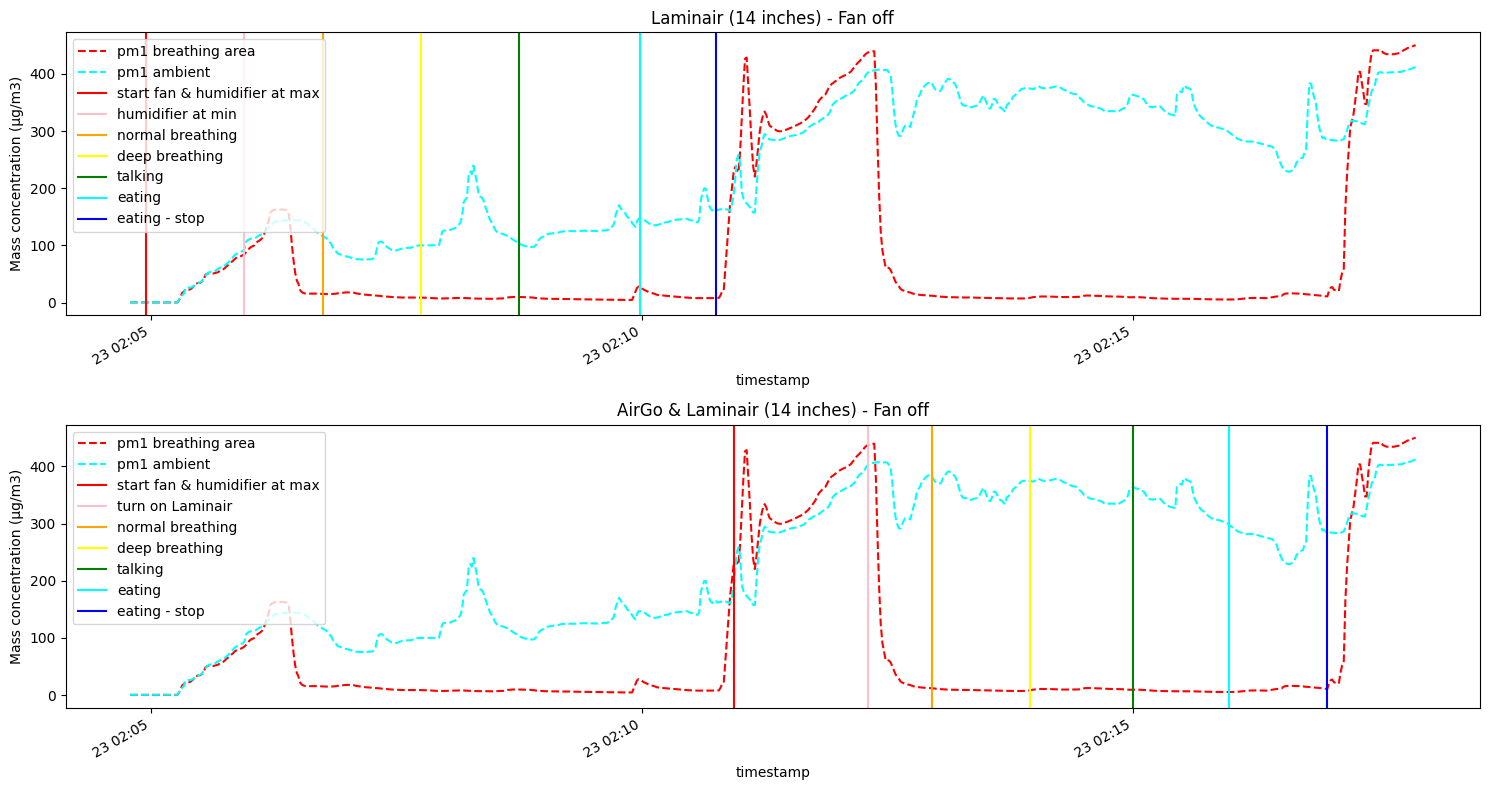

In [34]:
plot(
    airgo_and_laminair_14_inches_metadata, 
    breathing_area_data=laminair_and_airgo_1_14_inches, 
    ambient_data=laminair_and_airgo_2_14_inches,
    breathing_area_vars=['pm1 breathing area'],
    ambient_vars=['pm1 ambient'],
    row_size=4
)

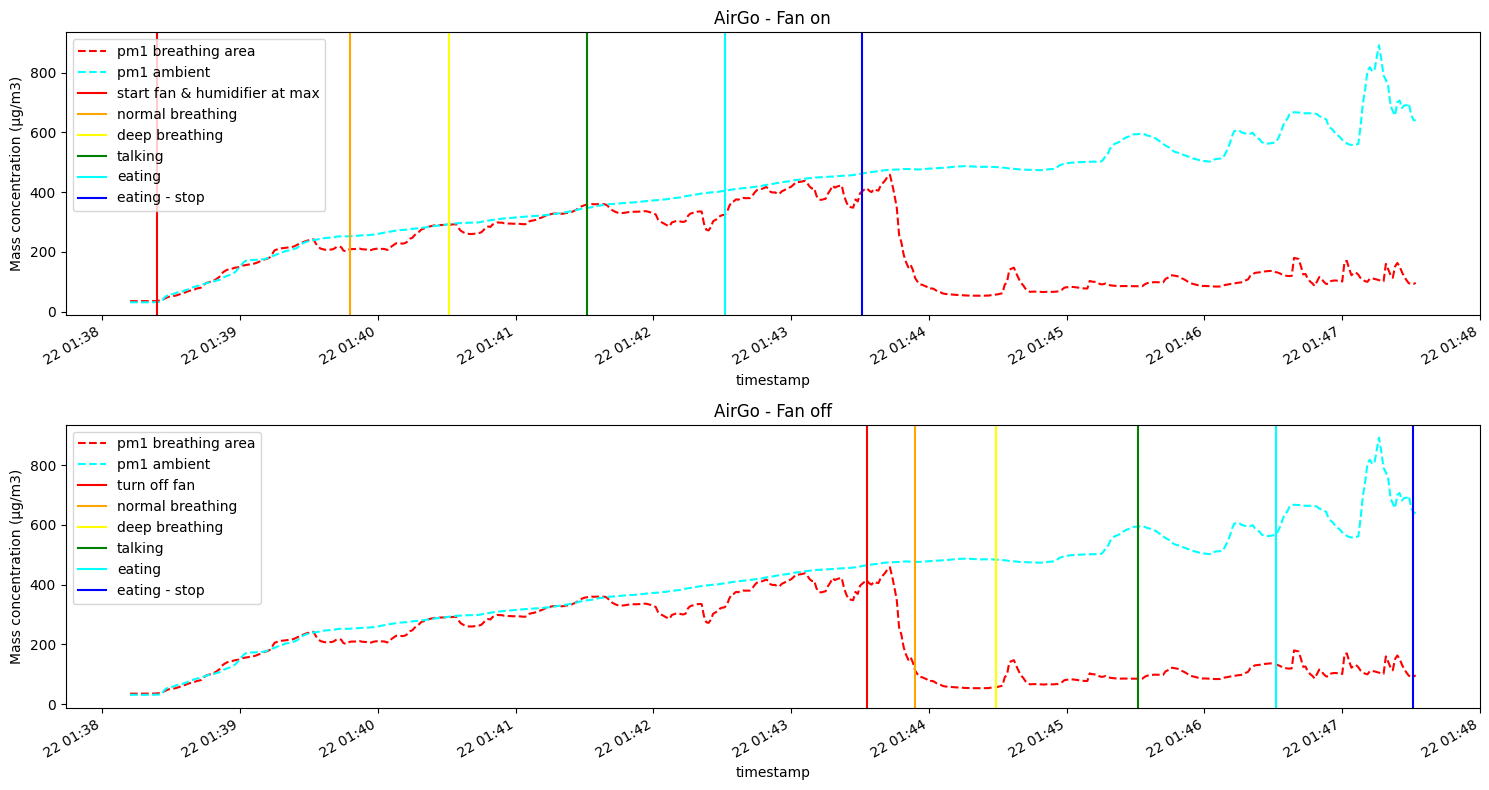

In [35]:
plot(
    airgo_metadata, 
    breathing_area_data=airgo_1, 
    ambient_data=airgo_2,
    breathing_area_vars=['pm1 breathing area'],
    ambient_vars=['pm1 ambient'],
    row_size=4
)

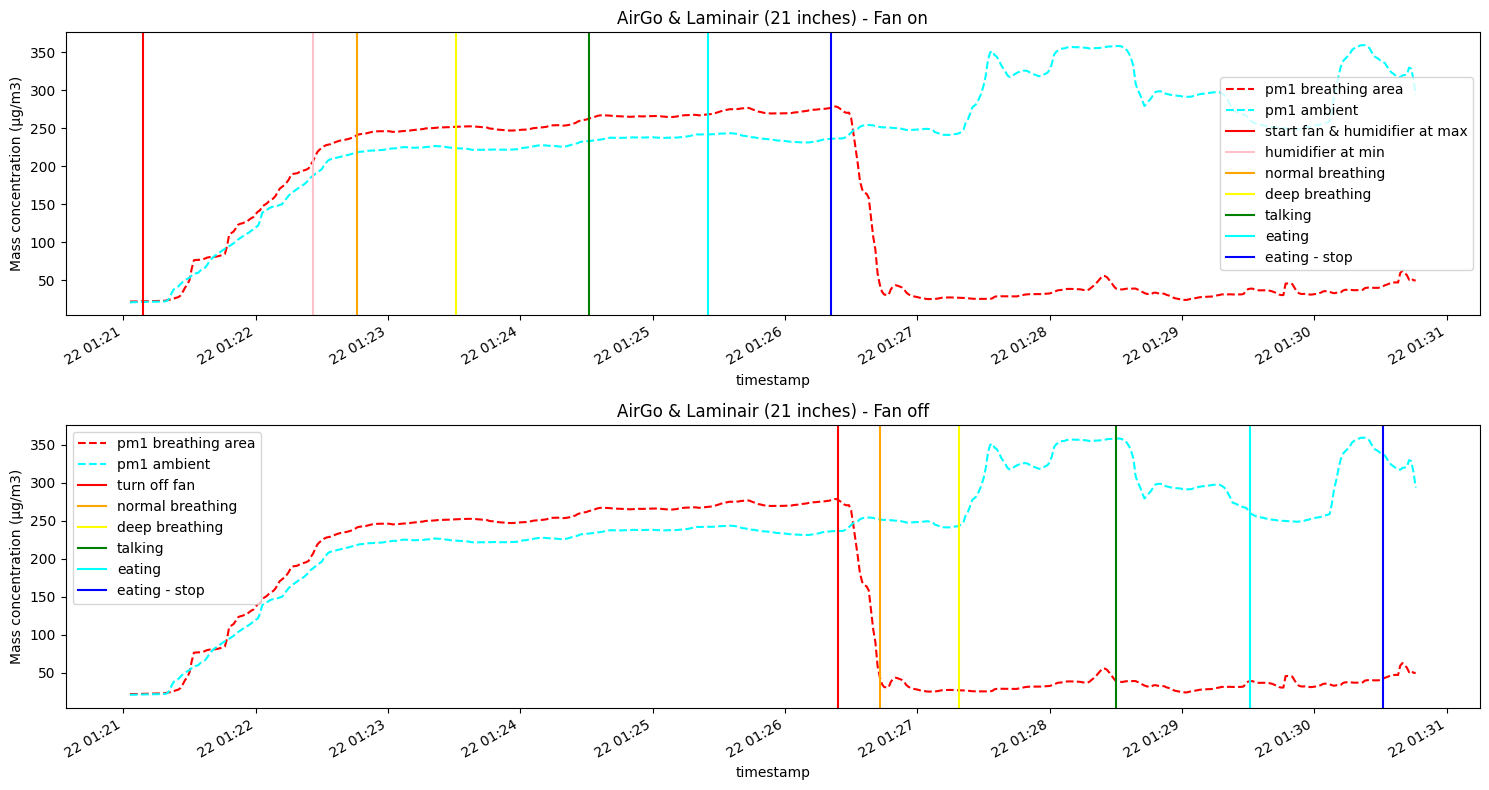

In [36]:
plot(
    airgo_and_laminair_metadata, 
    breathing_area_data=laminair_and_airgo_1, 
    ambient_data=laminair_and_airgo_2,
    breathing_area_vars=['pm1 breathing area'],
    ambient_vars=['pm1 ambient'],
    row_size=4
)

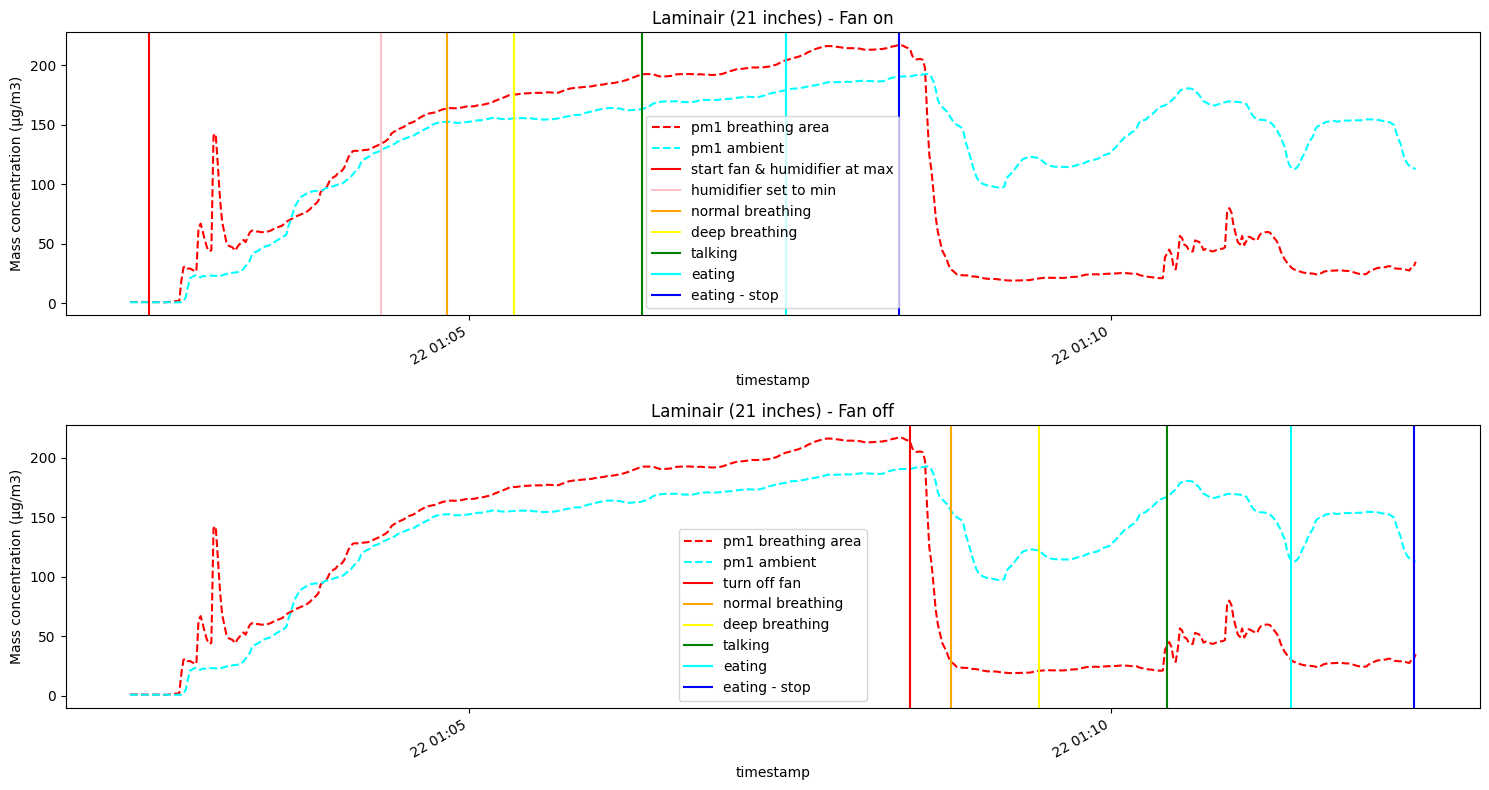

In [37]:
plot(
    laminair_metadata, 
    breathing_area_data=laminair_1, 
    ambient_data=laminair_2,
    breathing_area_vars=['pm1 breathing area'],
    ambient_vars=['pm1 ambient'],
    row_size=4
)

In [38]:
fit_factors = get_fit_factors(
    [
        {
            'metadata': airgo_metadata,
            'breathing_area_sensor_data': airgo_1,
            'ambient_sensor_data': airgo_2
        },
        {
            'metadata': laminair_metadata,
            'breathing_area_sensor_data': laminair_1,
            'ambient_sensor_data': laminair_2
        },
        {
            'metadata': airgo_and_laminair_metadata,
            'breathing_area_sensor_data': laminair_and_airgo_1,
            'ambient_sensor_data': laminair_and_airgo_2
        },
        {
            'metadata': airgo_and_laminair_14_inches_metadata,
            'breathing_area_sensor_data': laminair_and_airgo_1_14_inches,
            'ambient_sensor_data': laminair_and_airgo_2_14_inches
        },
        
    ],
    title='model - mixing fan',
    breathing_area_column='pm1 breathing area',
    ambient_column='pm1'
)

In [39]:
fit_factors

,model - mixing fan,event,fit_factor
0,AirGo - Fan on,start fan & humidifier at max,1.033429
1,AirGo - Fan on,normal breathing,1.130166
2,AirGo - Fan on,deep breathing,1.045530
3,AirGo - Fan on,talking,1.153954
4,AirGo - Fan on,eating,1.103729
5,AirGo - Fan off,turn off fan,1.438894
6,AirGo - Fan off,normal breathing,7.610709
7,AirGo - Fan off,deep breathing,6.012614
8,AirGo - Fan off,talking,5.361117
9,AirGo - Fan off,eating,5.535502


In [40]:
fit_factors['mixing_fan'] = fit_factors['model - mixing fan'].str.extract('(?<= - Fan )(.*)')

In [62]:
fit_factors['model - mixing fan'].str.extract('(.*)(?= -)')

,0
0,AirGo
1,AirGo
2,AirGo
3,AirGo
4,AirGo
5,AirGo
6,AirGo
7,AirGo
8,AirGo
9,AirGo


In [66]:
tmp = fit_factors['model - mixing fan'].str.extract('(.*)(?= -)')

In [67]:
tmp

,0
0,AirGo
1,AirGo
2,AirGo
3,AirGo
4,AirGo
5,AirGo
6,AirGo
7,AirGo
8,AirGo
9,AirGo


In [76]:
tmp[0].str.extract('(.*)(?= \()').isna()

,0
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [79]:
fit_factors['model - mixing fan'].str.extract('(.*)(?= -)')[0]

0                            AirGo
1                            AirGo
2                            AirGo
3                            AirGo
4                            AirGo
5                            AirGo
6                            AirGo
7                            AirGo
8                            AirGo
9                            AirGo
10            Laminair (21 inches)
11            Laminair (21 inches)
12            Laminair (21 inches)
13            Laminair (21 inches)
14            Laminair (21 inches)
15            Laminair (21 inches)
16            Laminair (21 inches)
17            Laminair (21 inches)
18            Laminair (21 inches)
19            Laminair (21 inches)
20            Laminair (21 inches)
21    AirGo & Laminair (21 inches)
22    AirGo & Laminair (21 inches)
23    AirGo & Laminair (21 inches)
24    AirGo & Laminair (21 inches)
25    AirGo & Laminair (21 inches)
26    AirGo & Laminair (21 inches)
27    AirGo & Laminair (21 inches)
28    AirGo & Lamina

In [81]:
fit_factors['model'] = tmp[0].str.extract('(.*)(?= \()').fillna(fit_factors['model - mixing fan'].str.extract('(.*)(?= -)')[0])[0]

In [82]:
fit_factors['Laminair distance'] = fit_factors['model - mixing fan'].str.extract('(?<=\()(\d+)')

In [83]:
fit_factors

,model - mixing fan,event,fit_factor,mixing_fan,model,Laminair distance
0,AirGo - Fan on,start fan & humidifier at max,1.033429,on,AirGo,NaN
1,AirGo - Fan on,normal breathing,1.130166,on,AirGo,NaN
2,AirGo - Fan on,deep breathing,1.045530,on,AirGo,NaN
3,AirGo - Fan on,talking,1.153954,on,AirGo,NaN
4,AirGo - Fan on,eating,1.103729,on,AirGo,NaN
5,AirGo - Fan off,turn off fan,1.438894,off,AirGo,NaN
6,AirGo - Fan off,normal breathing,7.610709,off,AirGo,NaN
7,AirGo - Fan off,deep breathing,6.012614,off,AirGo,NaN
8,AirGo - Fan off,talking,5.361117,off,AirGo,NaN
9,AirGo - Fan off,eating,5.535502,off,AirGo,NaN


In [85]:
fan_off_ff = fit_factors[fit_factors['model - mixing fan'].str.contains('Fan off')]

In [86]:
activities_ff = fit_factors[~fit_factors['event'].str.contains('humidifier|turn')]

In [87]:
pivot_table = activities_ff.pivot(index=['mixing_fan', 'Laminair distance', 'model'], columns=['event'], values='fit_factor')
pivot_table

event                                          deep breathing     eating  \
mixing_fan Laminair distance model                                         
off        NaN               AirGo                   6.012614   5.535502   
           14                AirGo & Laminair       33.910147  25.684325   
                             Laminair               17.847716  12.902580   
           21                AirGo & Laminair        9.728633   7.975015   
                             Laminair                5.648936   5.272954   
on         NaN               AirGo                   1.045530   1.103729   
           21                AirGo & Laminair        0.893167   0.868409   
                             Laminair                0.875962   0.868948   

event                                          normal breathing    talking  
mixing_fan Laminair distance model                                          
off        NaN               AirGo                     7.610709   5.361117  
           14                AirGo & Laminair         41.904258  49.133260  
                             Laminair                  7.088752  17.743484  
           21                AirGo & Laminair          8.075146   9.507151  
                             Laminair                  5.530108   3.260994  
on         NaN               AirGo                     1.130166   1.153954  
           21                AirGo & Laminair          0.903258   0.893971  
                             Laminair                  0.916057   0.881230

Text(0.5, 1.0, 'Fit Factors')

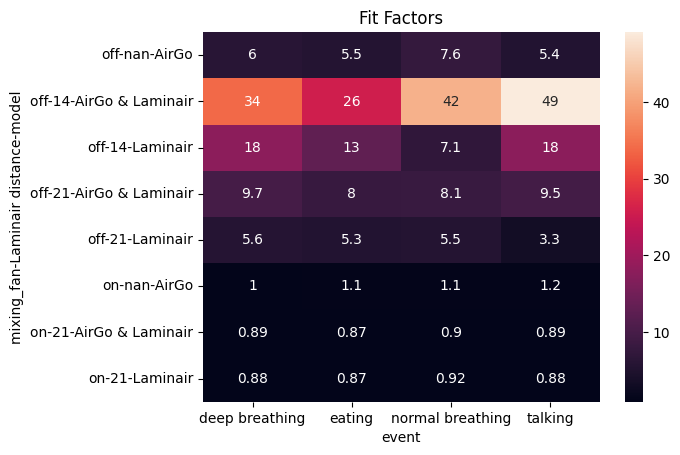

In [88]:
fig, ax = plt.subplots(1,1)
sns.heatmap(pivot_table, annot=True, ax=ax)
ax.set_title("Fit Factors")

In [ ]:
\=